In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [25]:
r = pd.read_csv("round2.csv")

In [26]:
print(r)

      rounded  original   not_rounded
0         100       100    404.582401
1       20000     20000  27728.907329
2         100       100    223.278123
3        1000      5000   2642.900114
4        1000       100    771.269840
...       ...       ...           ...
1527     5000     10000   5492.420110
1528     1000       100    934.726022
1529      100       100    411.369694
1530      100       100    192.822166
1531     1000       100    638.090445

[1532 rows x 3 columns]


In [27]:
import numpy as np

def concordance_index(true_values, predicted_scores):
    n = len(true_values)
    assert n == len(predicted_scores), "Lists must have the same length."

    concordant = 0
    discordant = 0
    ties = 0

    for i in range(n):
        for j in range(i + 1, n):
            if true_values[i] != true_values[j]:
                if (predicted_scores[i] < predicted_scores[j] and
                        true_values[i] < true_values[j]):
                    concordant += 1
                elif (predicted_scores[i] > predicted_scores[j] and
                      true_values[i] > true_values[j]):
                    concordant += 1
                elif predicted_scores[i] == predicted_scores[j]:
                    ties += 1
                else:
                    discordant += 1

    c_index = (concordant + 0.5 * ties) / (concordant + discordant + ties)

    return c_index

c_index_value = concordance_index(r['original'], r['rounded'])
print("Concordance Index:", c_index_value)


Concordance Index: 0.88775121136643


In [28]:
print(concordance_index(r['original'], r['not_rounded']))


0.9503680004838985


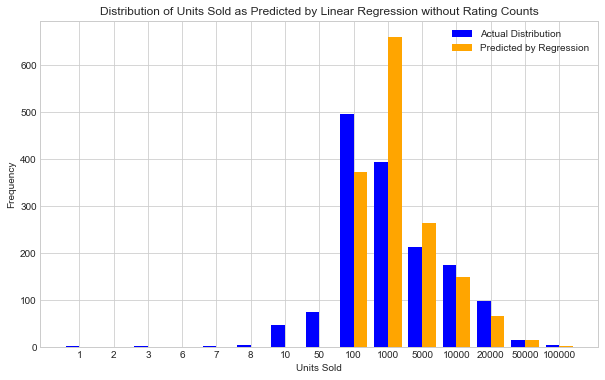

In [29]:
from collections import Counter



def plot_frequency_comparison(list1, list2, labels=None):
    plt.figure(figsize=(10,6))
    plt.style.use('seaborn-whitegrid')
    counter1 = Counter(list1)
    counter2 = Counter(list2)

    categories = sorted(set(counter1) | set(counter2))
    values1 = [counter1[category] for category in categories]
    values2 = [counter2[category] for category in categories]

    x = range(len(categories))

    plt.bar(x, values1, width=-0.4, align='edge', label='Actual Distribution', color='blue')
    plt.bar(x, values2, width=0.4, align='edge', label='Predicted by Regression', color='orange')

    plt.title('Distribution of Units Sold as Predicted by Linear Regression without Rating Counts')
    plt.xlabel('Units Sold')
    plt.ylabel('Frequency')
    plt.xticks(x, labels if labels else categories)
    plt.legend()
    plt.show()

plot_frequency_comparison(r['original'], r['rounded'])

In [30]:
from sklearn.metrics import mutual_info_score

def calculate_mutual_information(true_labels, predicted_labels):
    mutual_info = mutual_info_score(true_labels, predicted_labels)
    return mutual_info

# Example usage:
true_labels = [0, 1, 1, 0, 1, 0, 1]
predicted_labels = [0, 1, 0, 0, 1, 1, 1]

mutual_information = calculate_mutual_information(r['original'], r['rounded'])
print("Mutual Information:", mutual_information)

Mutual Information: 0.7995010261890874


# bad

In [31]:
r_bad = pd.read_csv("round_bad2.csv")

In [32]:
print(concordance_index(r_bad['original'], r_bad['rounded']))
print(concordance_index(r_bad['original'], r_bad['not_rounded']))


0.6410078050234712
0.6773045125694794


In [33]:
mutual_information = calculate_mutual_information(r_bad['original'], r_bad['rounded'])
print("Mutual Information:", mutual_information)

Mutual Information: 0.11287073709386389


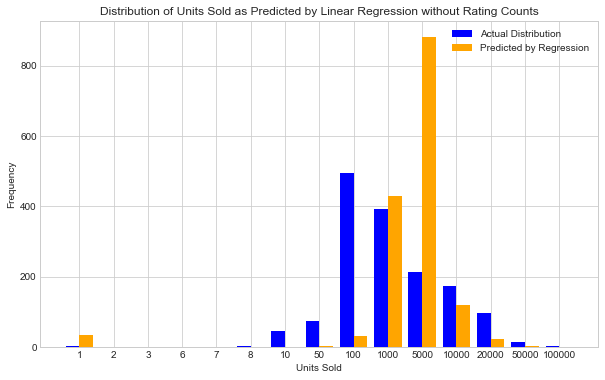

In [34]:
plot_frequency_comparison(r_bad['original'], r_bad['rounded'])